# **Car Price Prediction**

**Dataset** : https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

**Model** : Random Forest, Gradient Boosting, XGBoost, KNN, MLP

# **Data Loading**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

In [2]:
folder_path = "/kaggle/input/used-car-dataset-ford-and-mercedes"

csv_files = [file for file in os.listdir(folder_path) 
             if file.endswith('.csv') and "unclean" not in file.lower()]

# Mapping untuk perbaikan nama brand
brand_corrections = {
    "hyundi": "hyundai",
    "merc": "mercedes",
    "cclass": "mercedes",
    "focus": "ford"
}

df_list = []
for file in csv_files:
    brand = file.split(".")[0].lower()
    
    brand = brand_corrections.get(brand, brand)
    
    df_temp = pd.read_csv(os.path.join(folder_path, file))
    df_temp = df_temp.rename(columns={"tax(£)": "tax"})
    df_temp["brand"] = brand
    
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

cols = ["brand"] + [col for col in df.columns if col != "brand"]
df = df[cols]

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,brand,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,mercedes,C Class,2020,30495,Automatic,1200,Diesel,2.0,NaN,NaN
1,mercedes,C Class,2020,29989,Automatic,1000,Petrol,1.5,NaN,NaN
2,mercedes,C Class,2020,37899,Automatic,500,Diesel,2.0,NaN,NaN
3,mercedes,C Class,2019,30399,Automatic,5000,Diesel,2.0,NaN,NaN
4,mercedes,C Class,2019,29899,Automatic,4500,Diesel,2.0,NaN,NaN


# Exploratory Data Analysis (EDA)

## Deskripsi Variabel

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   engineSize    108540 non-null  float64
 8   tax           99187 non-null   float64
 9   mpg           99187 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,brand,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,mercedes,C Class,2020,30495,Automatic,1200,Diesel,2.0,NaN,NaN
1,mercedes,C Class,2020,29989,Automatic,1000,Petrol,1.5,NaN,NaN
2,mercedes,C Class,2020,37899,Automatic,500,Diesel,2.0,NaN,NaN
3,mercedes,C Class,2019,30399,Automatic,5000,Diesel,2.0,NaN,NaN
4,mercedes,C Class,2019,29899,Automatic,4500,Diesel,2.0,NaN,NaN


In [5]:
df.describe()

,year,price,mileage,engineSize,tax,mpg
count,108540.000000,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000
mean,2017.098028,16890.124046,23025.928469,1.661644,120.299838,55.166825
std,2.130057,9756.266820,21176.423684,0.557058,63.150926,16.138522
min,1970.000000,450.000000,1.000000,0.000000,0.000000,0.300000
25%,2016.000000,10229.500000,7491.750000,1.200000,125.000000,47.100000
50%,2017.000000,14698.000000,17265.000000,1.600000,145.000000,54.300000
75%,2019.000000,20940.000000,32236.000000,2.000000,145.000000,62.800000
max,2060.000000,159999.000000,323000.000000,6.600000,580.000000,470.800000


In [6]:
df.shape

(108540, 10)

## Univariate Analysis

In [7]:
numerical_features = [
    "year", "mileage", "price", "engineSize", "tax", "mpg"
]

categorical_features = [
    "brand", "model", "transmission", "fuelType"
]

### Categorical Features


Distribusi data untuk brand:
           jumlah sampel  persentase
brand                              
ford              23419        21.6
mercedes          17018        15.7
vw                15157        14.0
vauxhall          13632        12.6
bmw               10781         9.9
audi              10668         9.8
toyota             6738         6.2
skoda              6267         5.8
hyundai            4860         4.5


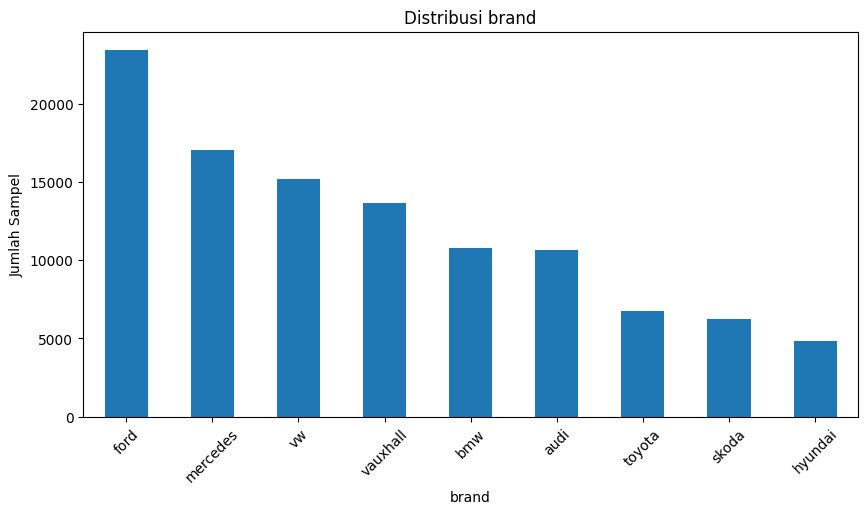


Distribusi data untuk model:
           jumlah sampel  persentase
model                              
 Focus            10042         9.3
 C Class           7646         7.0
 Fiesta            6557         6.0
 Golf              4863         4.5
 Corsa             3441         3.2
...                 ...         ...
 Accent               1         0.0
 A2                   1         0.0
 RS7                  1         0.0
 Amica                1         0.0
200                   1         0.0

[195 rows x 2 columns]


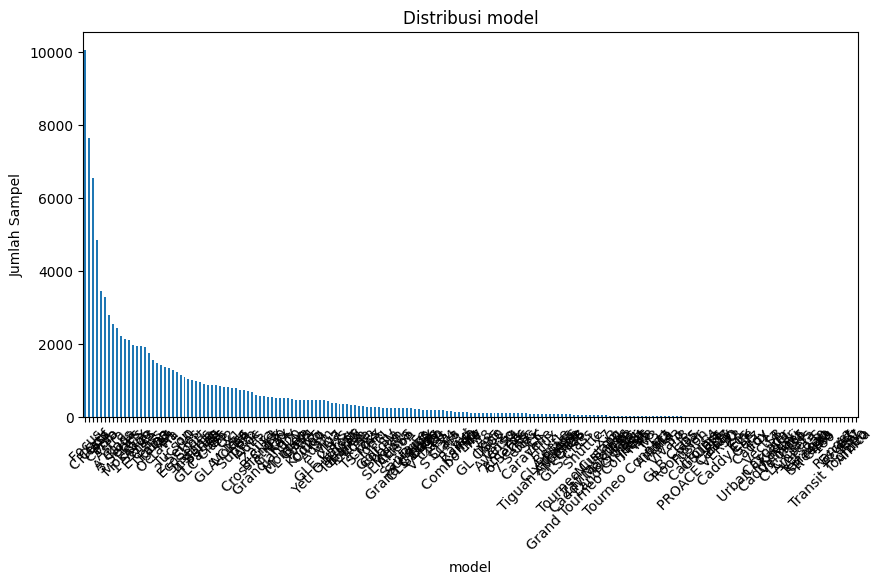


Distribusi data untuk transmission:
               jumlah sampel  persentase
transmission                           
Manual                61308        56.5
Semi-Auto             24903        22.9
Automatic             22319        20.6
Other                    10         0.0


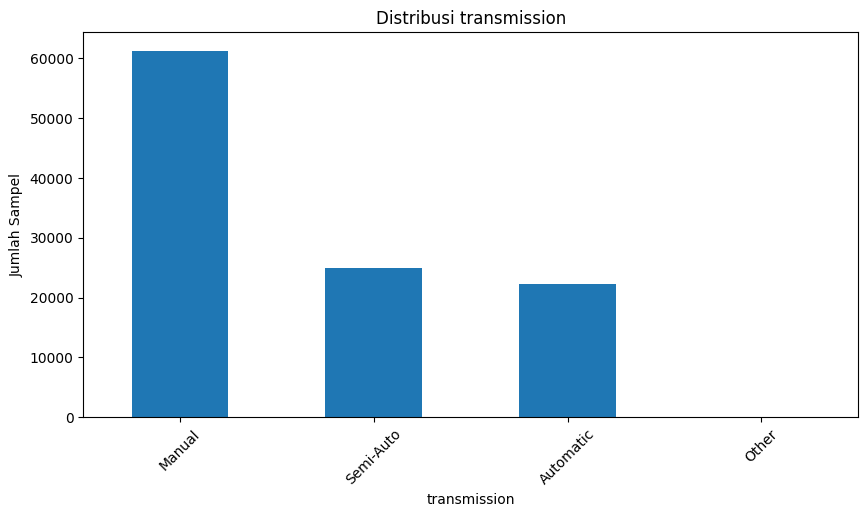


Distribusi data untuk fuelType:
           jumlah sampel  persentase
fuelType                           
Petrol            59875        55.2
Diesel            45177        41.6
Hybrid             3229         3.0
Other               253         0.2
Electric              6         0.0


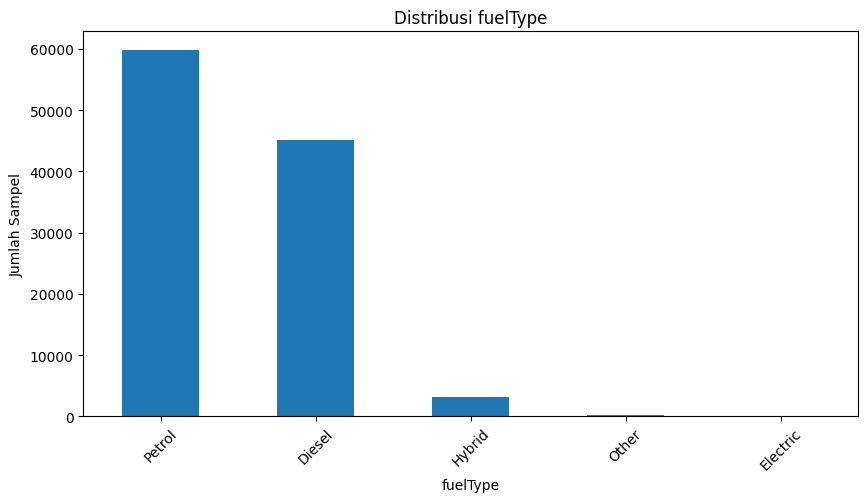

In [8]:
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)

    df_summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nDistribusi data untuk {feature}:\n", df_summary)

    plt.figure(figsize=(10, 5))
    count.plot(kind='bar', title=f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=45)
    plt.show()

### Numerical Features

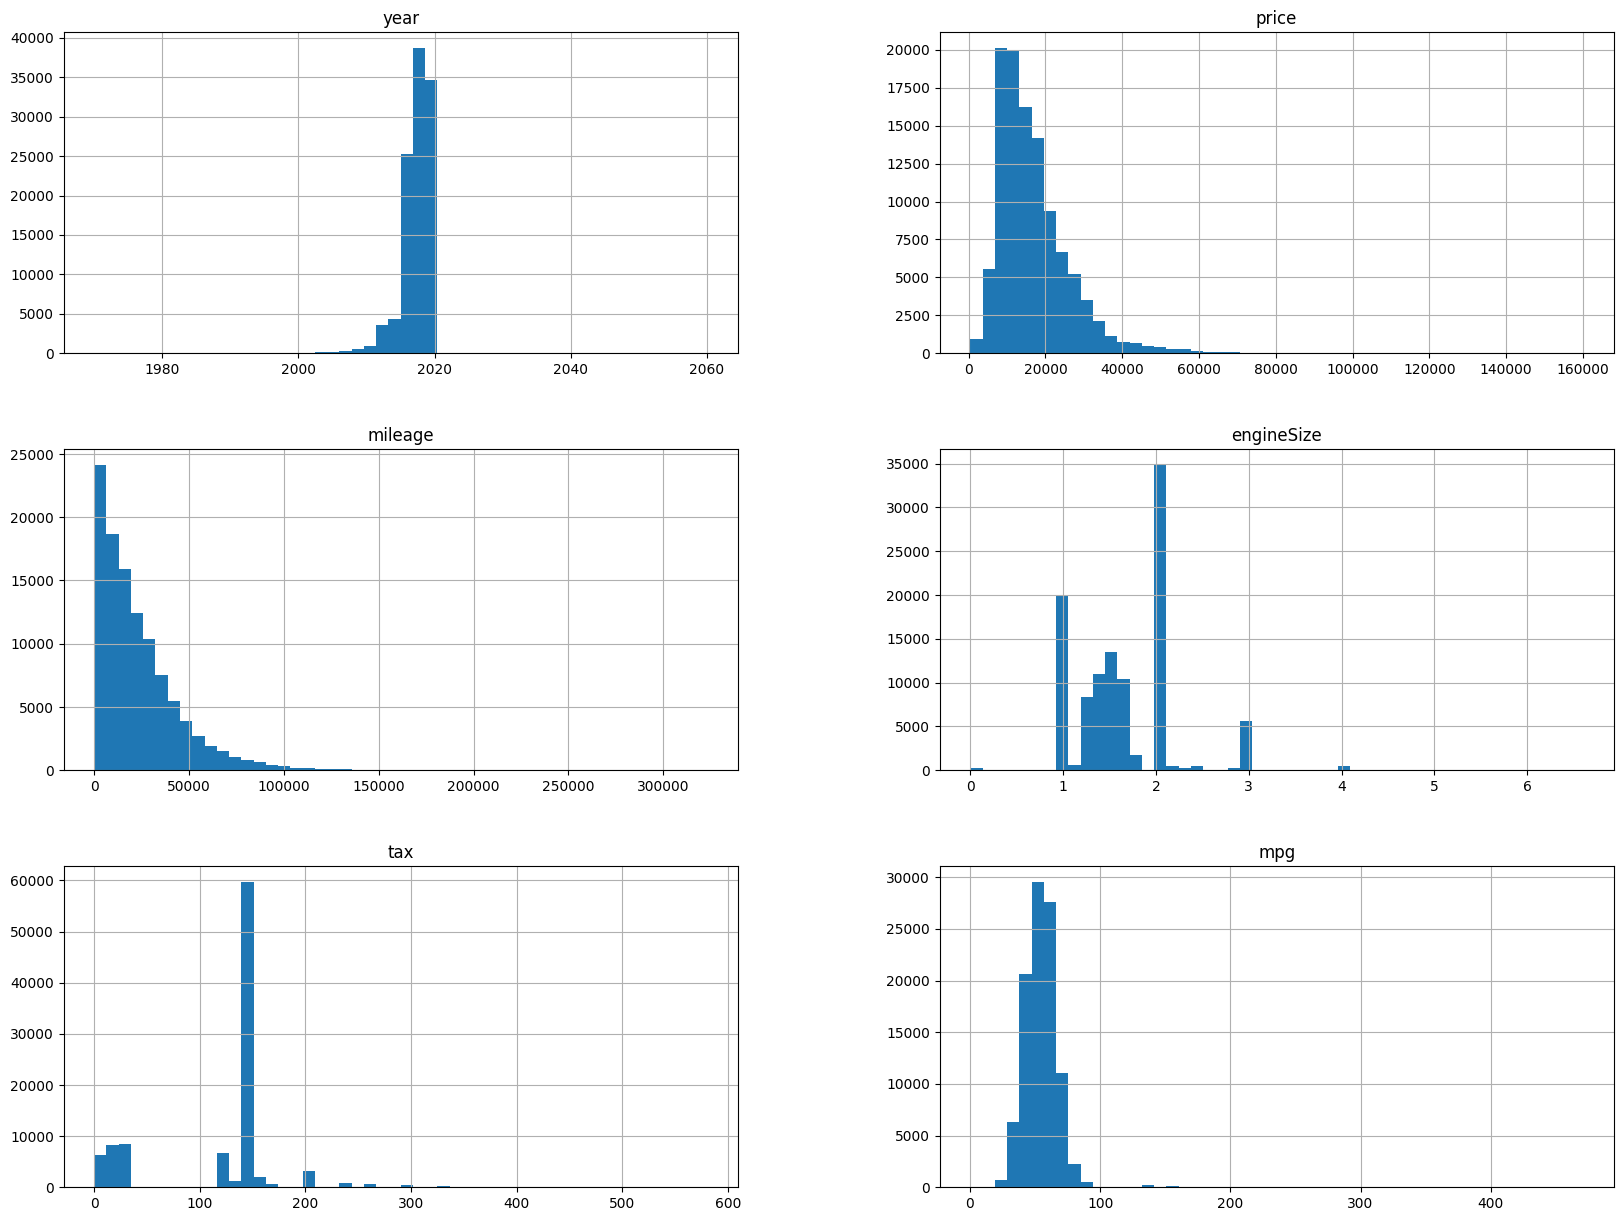

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Categorical Features

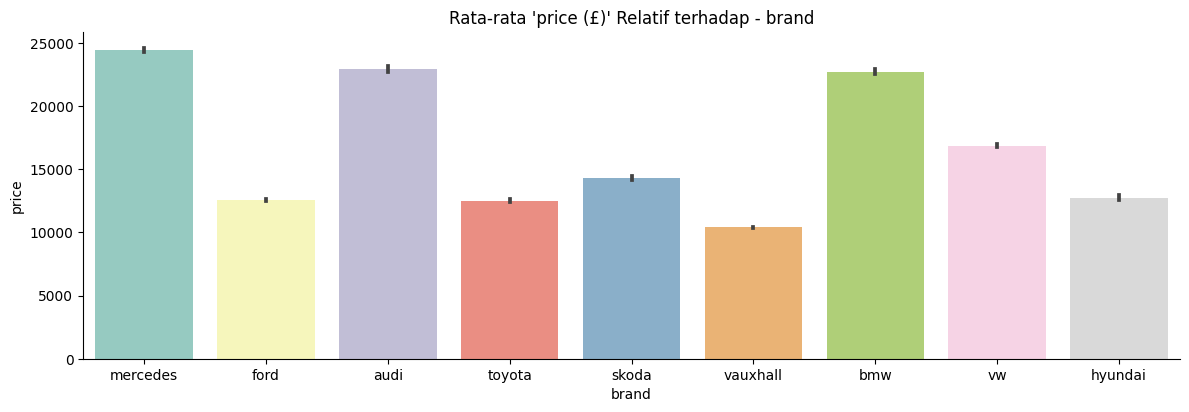

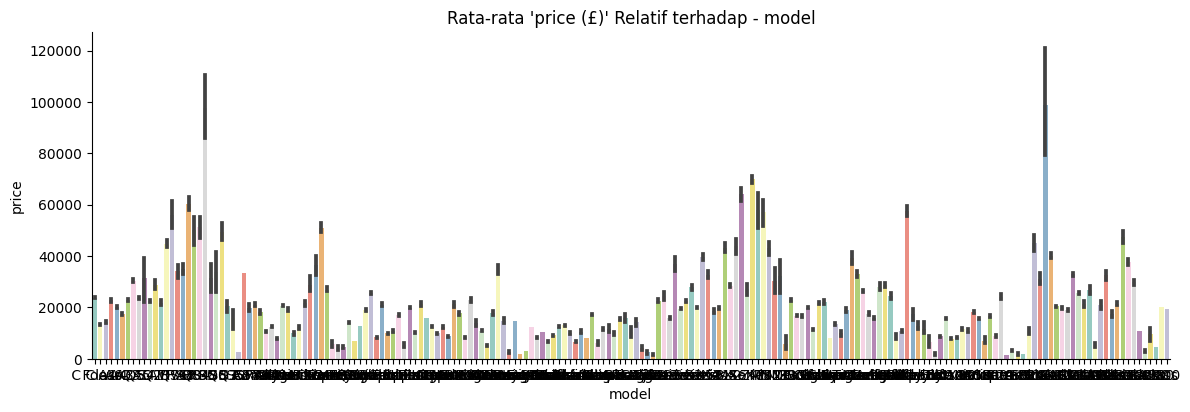

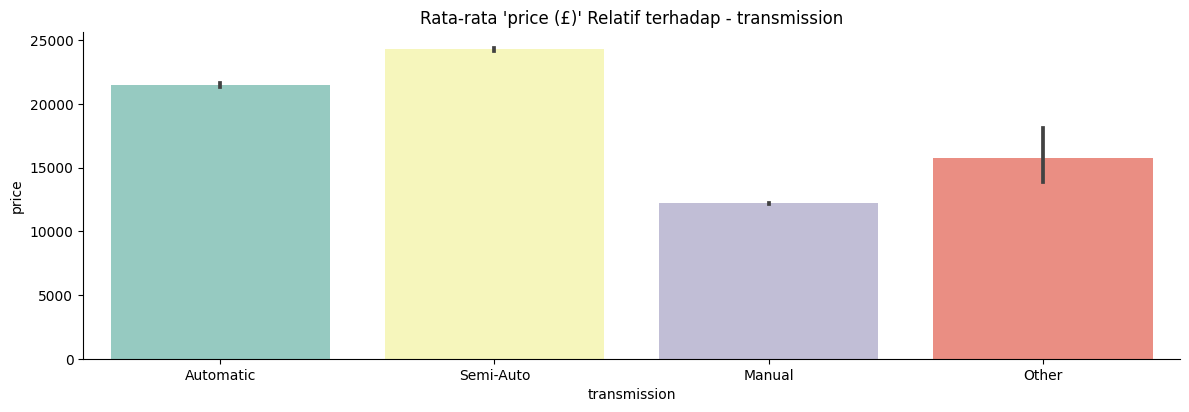

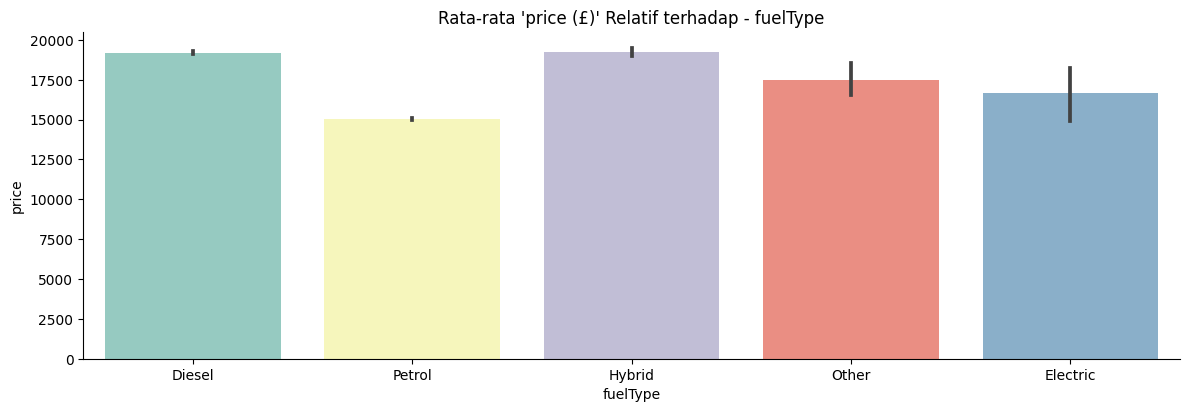

In [10]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price (£)' Relatif terhadap - {}".format(col))

### Numerical Features

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

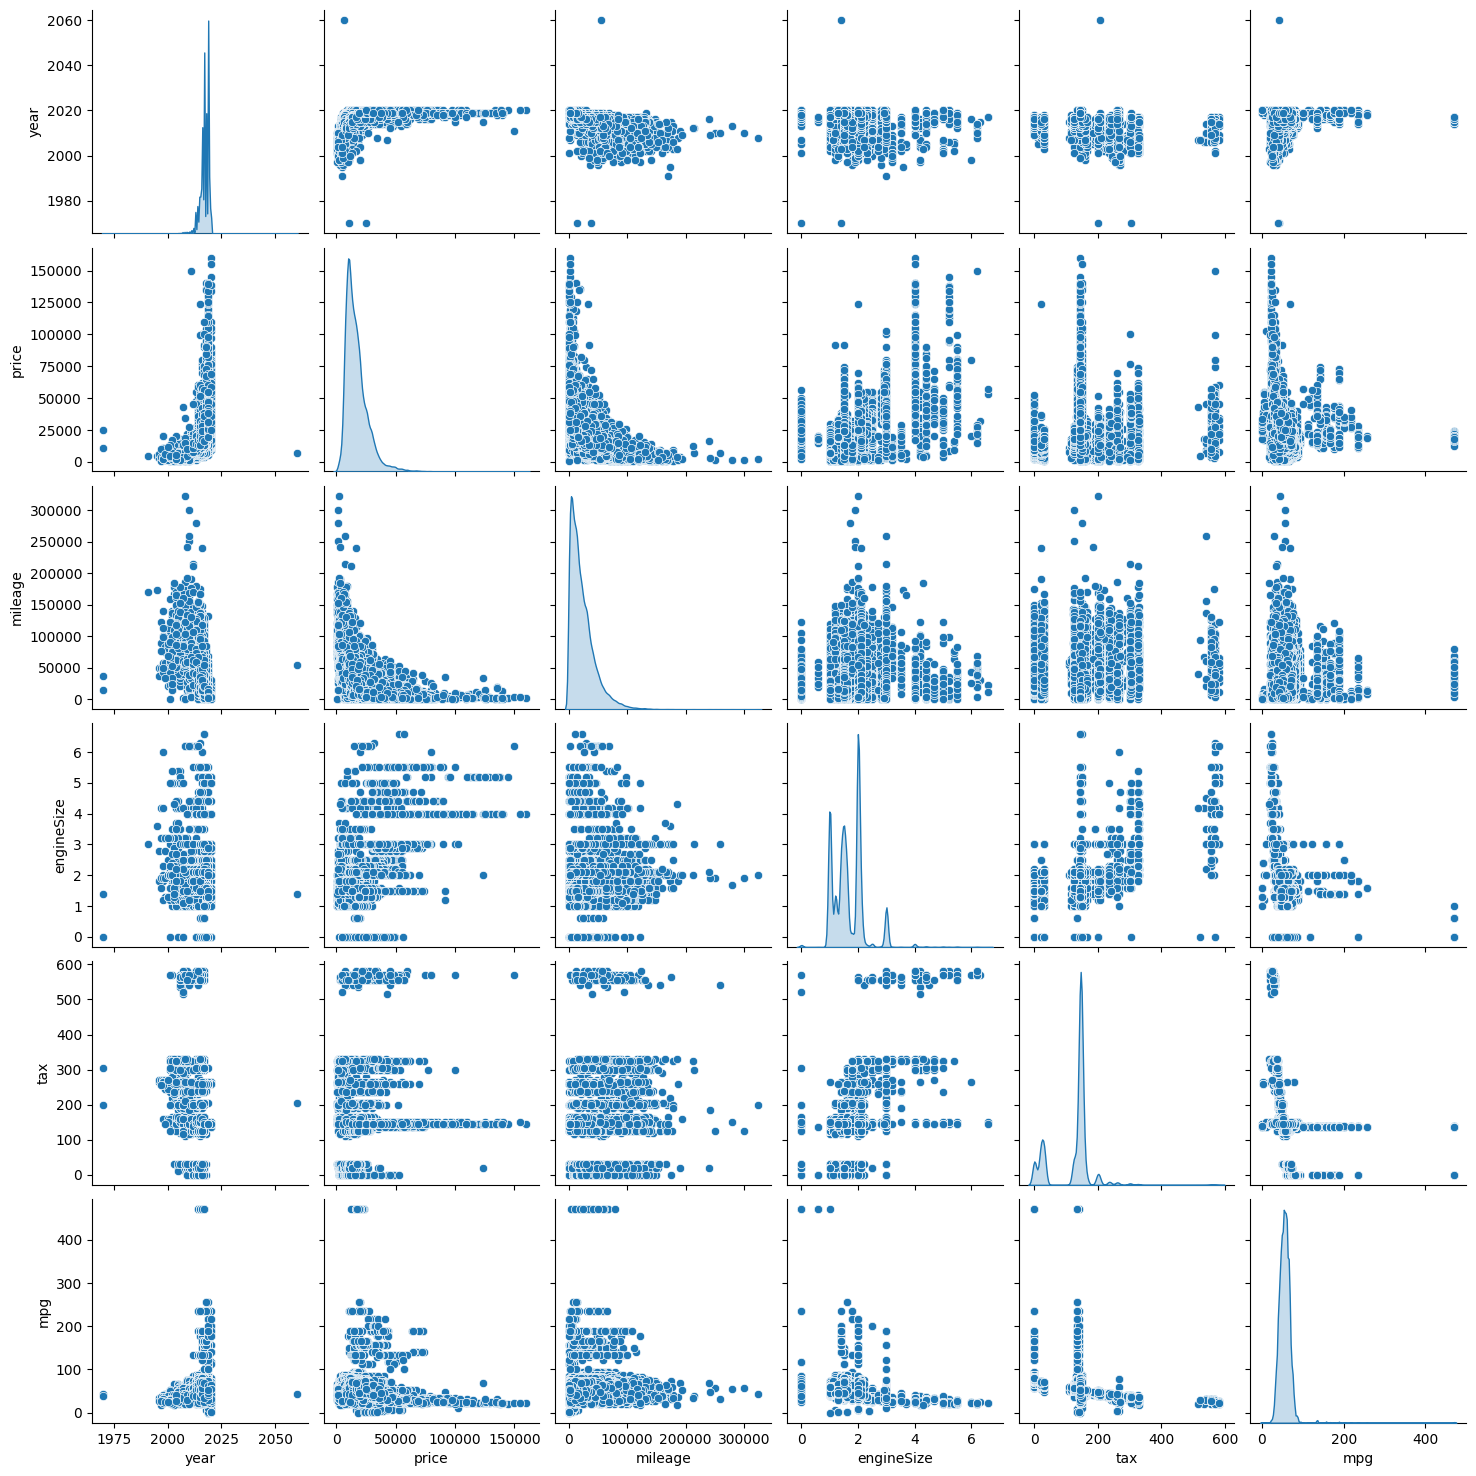

In [11]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

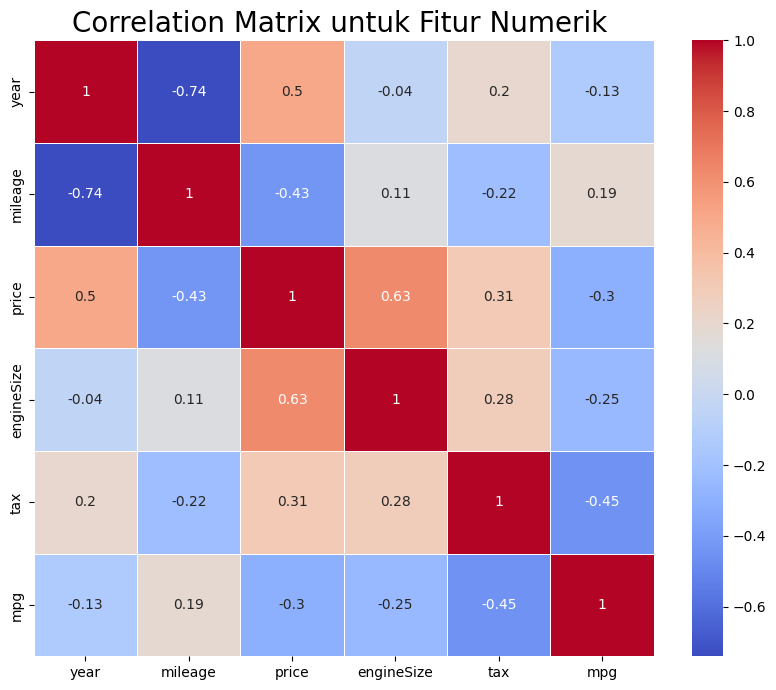

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **Data Preparation**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   engineSize    108540 non-null  float64
 8   tax           99187 non-null   float64
 9   mpg           99187 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


In [14]:
df.drop(columns=["mpg", "tax"], inplace=True)
df.head()

,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,mercedes,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,mercedes,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,mercedes,C Class,2020,37899,Automatic,500,Diesel,2.0
3,mercedes,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,mercedes,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   engineSize    108540 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.6+ MB


In [16]:
# Cek jumlah missing values pada dataset
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

## Menangani Missing Values & Outliers

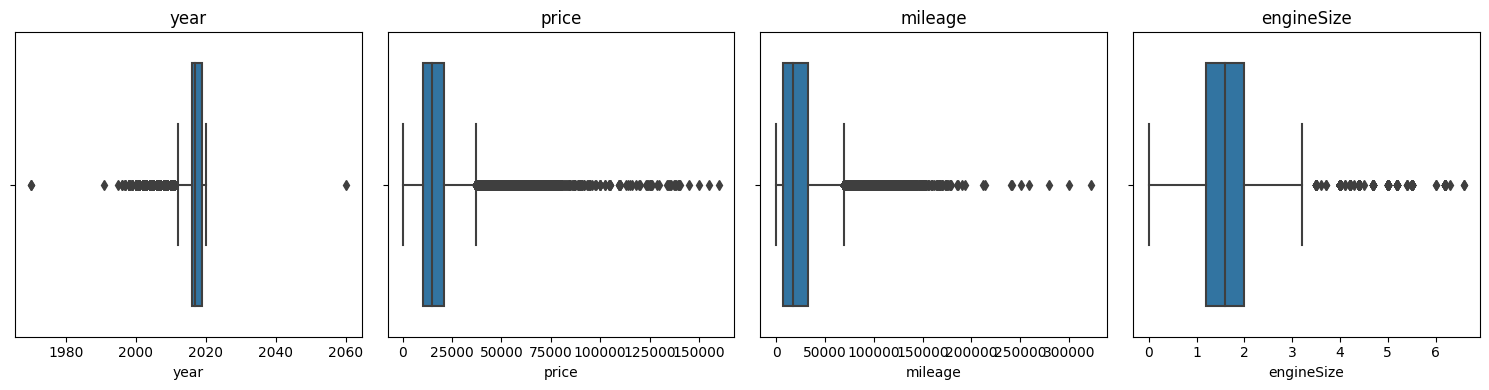

In [17]:
# Tidak ada Missing Values, lanjut atasi Outliers
# Menampilkan boxplot dari fitur-fitur numerikal untuk mendeteksi outlier
num_features = df.select_dtypes(include=['number']).columns
num_plots = len(num_features)
rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
# Mengatasi outliers dengan metode IQR
numerical_outlier = [
    "year", "price", "mileage", "engineSize"
]

Q1 = df[numerical_outlier].quantile(0.25)
Q3 = df[numerical_outlier].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[~((df[numerical_outlier] < lower_bound) | (df[numerical_outlier] > upper_bound)).any(axis=1)]
df.shape

(99391, 8)

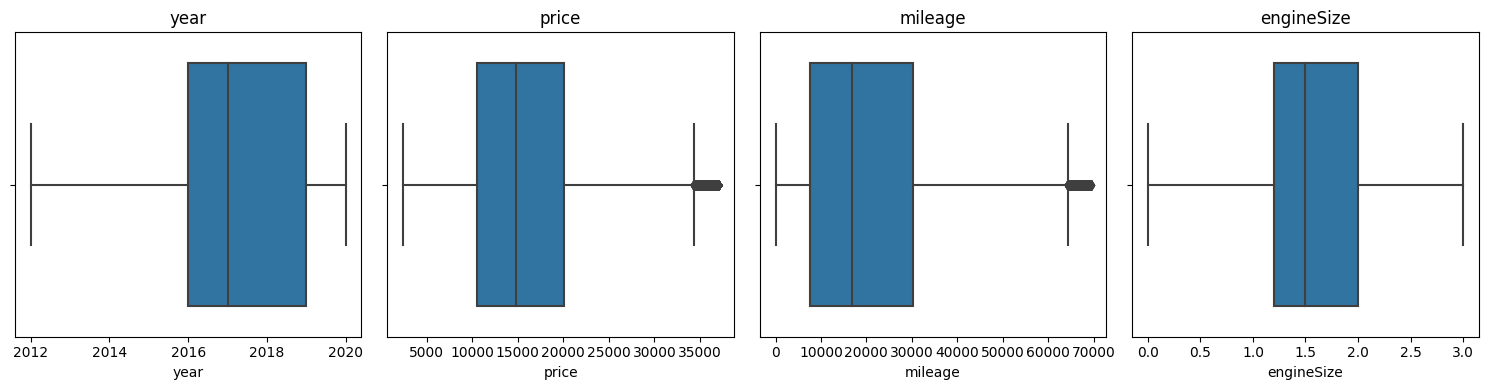

In [19]:
# Menampilkan ulang boxplot untuk mengecek apakah outlier sudah teratasi
num_features = df.select_dtypes(include=['number']).columns
num_plots = len(num_features)
rows = (num_plots // 4) + (num_plots % 4 > 0)
fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Encoding for Categorical Feature

In [20]:
# One-Hot Encoding untuk brand, transmission, fuelType
df = pd.get_dummies(df, columns=["brand", "transmission", "fuelType"], drop_first=True)

# Frequency Encoding untuk model
model_counts = df["model"].value_counts()
df["model_encoded"] = df["model"].map(model_counts)
df = df.drop(columns=["model"])

df = df.astype(int)

df.head()

,year,price,mileage,engineSize,brand_bmw,brand_ford,brand_hyundai,brand_mercedes,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_encoded
0,2020,30495,1200,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775
1,2020,29989,1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6775
3,2019,30399,5000,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775
4,2019,29899,4500,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775
5,2020,30999,1000,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775


## Dimensionality Reduction with PCA

In [21]:
from sklearn.decomposition import PCA


features_mileage_year = ["mileage", "year"]

pca_mileage_year = PCA(n_components=1, random_state=42)
df["vehicle_age_usage"] = pca_mileage_year.fit_transform(df[features_mileage_year]).flatten()

df.drop(columns=features_mileage_year, inplace=True)

# Menampilkan beberapa baris pertama hasil transformasi
df.head()

,price,engineSize,brand_bmw,brand_ford,brand_hyundai,brand_mercedes,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_encoded,vehicle_age_usage
0,30495,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-19348.726608
1,29989,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6775,-19548.726607
3,30399,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-15548.726541
4,29899,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-16048.726540
5,30999,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-19548.726607


In [22]:
print(f"Variansi yang dijelaskan oleh komponen vehicle_age_usage: {pca_mileage_year.explained_variance_ratio_[0]:.2f}")

Variansi yang dijelaskan oleh komponen vehicle_age_usage: 1.00


## Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price"])  
y = df["price"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 89451
Jumlah data uji: 9940


## Standarization

In [24]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["engineSize", "vehicle_age_usage", "model_encoded"]

scaler = StandardScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train[numerical_features].head()

,engineSize,vehicle_age_usage,model_encoded
414,1.104940,2.050272,1.298594
63325,1.104940,-0.264713,-0.721938
37310,1.104940,0.280866,-0.282587
72452,1.104940,-1.186734,-0.728121
80127,-0.705246,1.457536,0.555580


In [25]:
X_train[numerical_features].describe().round(4)

,engineSize,vehicle_age_usage,model_encoded
count,89451.0000,89451.0000,89451.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-2.5154,-1.2912,-1.0283
25%,-0.7052,-0.8099,-0.7638
50%,-0.7052,-0.2331,-0.3966
75%,1.1049,0.6168,0.5556
max,2.9151,3.0692,2.2484


In [26]:
df.head()

,price,engineSize,brand_bmw,brand_ford,brand_hyundai,brand_mercedes,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,model_encoded,vehicle_age_usage
0,30495,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-19348.726608
1,29989,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6775,-19548.726607
3,30399,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-15548.726541
4,29899,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-16048.726540
5,30999,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6775,-19548.726607


# Modelling

In [27]:
!pip install xgboost lightgbm

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor

## Grid Search

In [28]:
# Model yang digunakan
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror"),
    "KNN": KNeighborsRegressor(),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Hyperparameter tuning untuk GridSearch
param_grids = {
    "Random Forest": {
        "n_estimators": [300, 500],
        "max_depth": [10, 20],
        "min_samples_split": [5, 10],
        "min_samples_leaf": [1, 2]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.5],
        "max_depth": [7, 15]
    },
    "XGBoost": {
        "n_estimators": [100, 300, 500],
        "max_depth": [7, 15],
        "learning_rate": [0.01, 0.1, 0.5]
    },
    "KNN": {
        "n_neighbors": [7, 10, 20],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "LightGBM": {
        "n_estimators": [100, 300, 500],
        "learning_rate": [0.01, 0.1, 0.3],
        "num_leaves": [31, 50],
        "max_depth": [-1, 15]
    }
}

best_models = {}
grid_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        grid_results[name] = {
            "MAE": -grid_search.best_score_,
            "Best Params": best_params
        }
        
        print(f"Best Params for {name}: {best_params}")
    else:
        best_model = model.fit(X_train, y_train)
    
    best_models[name] = best_model

grid_results_df = pd.DataFrame.from_dict(grid_results, orient="index")

# Urutkan berdasarkan MAE
grid_results_df = grid_results_df.sort_values(by="MAE", ascending=True)

print("\nBest Models from GridSearch (Sorted by MAE):")
print(grid_results_df)


Training Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

Training Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

Training XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500}

Training KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

Training LightGBM...
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 89451, number of used features: 16
[LightGBM] [Info] Start training from score 16066.146751
Best Params for LightGBM: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 500, 'num_leaves': 50}

Best Models from GridSearch (Sorted by MAE):
                           MAE  \
XGBoost            1582.604978   
LightGBM           1584.173580   
Gradient Boosting  1584.469581   
Random Forest      1627.047213   
KNN                1672.468759   

                                                         Best Params  
XGBoost            {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...  
LightGBM           {'learning_rate': 0.1, 'max_depth': 15, 'n_est...  
Gradient Boosting  {'l

# Evaluation

Random Forest Performance:
   - Train MAE: 1180.72, Test MAE: 1599.19
   - Train MSE: 2623304.47, Test MSE: 4918914.73
   - Train RMSE: 1619.66, Test RMSE: 2217.86
   - Train R² Score: 0.9479, Test R² Score: 0.9040
--------------------------------------------------
Gradient Boosting Performance:
   - Train MAE: 1382.73, Test MAE: 1571.23
   - Train MSE: 3492845.49, Test MSE: 4664656.17
   - Train RMSE: 1868.92, Test RMSE: 2159.78
   - Train R² Score: 0.9306, Test R² Score: 0.9089
--------------------------------------------------
XGBoost Performance:
   - Train MAE: 1422.86, Test MAE: 1570.31
   - Train MSE: 3757811.05, Test MSE: 4665602.29
   - Train RMSE: 1938.51, Test RMSE: 2160.00
   - Train R² Score: 0.9254, Test R² Score: 0.9089
--------------------------------------------------
KNN Performance:
   - Train MAE: 57.79, Test MAE: 1576.40
   - Train MSE: 108876.37, Test MSE: 5750268.36
   - Train RMSE: 329.96, Test RMSE: 2397.97
   - Train R² Score: 0.9978, Test R² Score: 0.8878
---

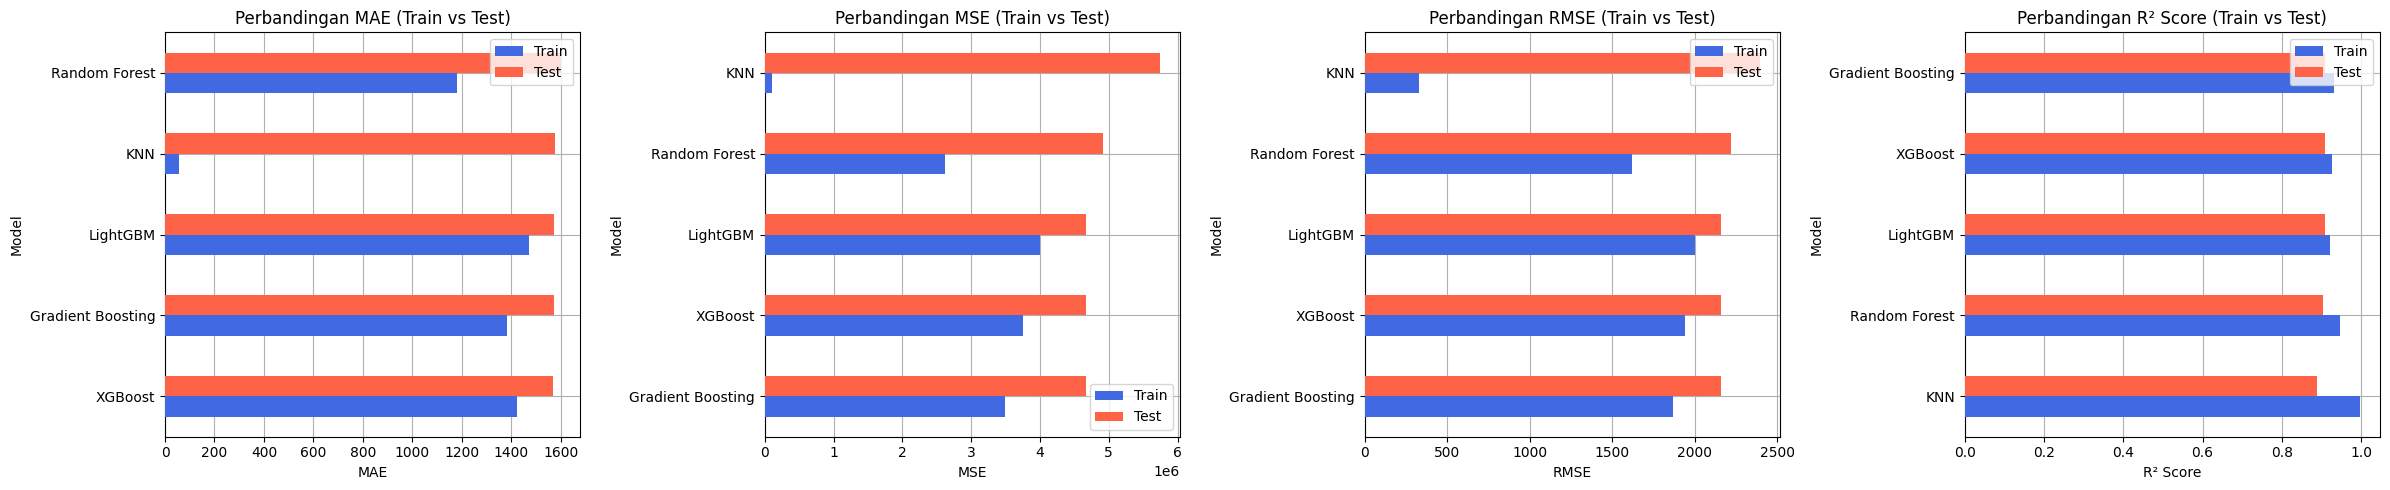

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = {}

for name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluasi pada data train
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Evaluasi pada data test
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        "Train MAE": train_mae, "Test MAE": test_mae,
        "Train MSE": train_mse, "Test MSE": test_mse,
        "Train RMSE": train_rmse, "Test RMSE": test_rmse,
        "Train R² Score": train_r2, "Test R² Score": test_r2
    }
    
    print(f"{name} Performance:")
    print(f"   - Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"   - Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"   - Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"   - Train R² Score: {train_r2:.4f}, Test R² Score: {test_r2:.4f}")
    print("-" * 50)

# Menampilkan hasil evaluasi dalam tabel
results_df = pd.DataFrame(results).T
print("\nFinal Model Performance:")
print(results_df)

# Visualisasi hasil evaluasi (Train vs Test)
metrics = ["MAE", "MSE", "RMSE", "R² Score"]
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

for i, metric in enumerate(metrics):
    train_col = f"Train {metric}"
    test_col = f"Test {metric}"
    
    sorted_results = results_df[[train_col, test_col]].sort_values(by=test_col, ascending=True)
    
    sorted_results.plot(kind="barh", ax=axes[i], color=["royalblue", "tomato"], zorder=3)
    axes[i].set_title(f"Perbandingan {metric} (Train vs Test)")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Model")
    axes[i].legend(["Train", "Test"])
    axes[i].grid(zorder=0)

plt.tight_layout()
plt.show()

In [30]:
# Pilih beberapa sampel untuk inference
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
X_sample = X_test.loc[sample_indices].copy()
y_true = y_test.loc[sample_indices]

pred_dict = {"y_true": y_true.values}

for name, model in best_models.items():
    pred_dict[f"prediksi_{name}"] = model.predict(X_sample).round(1)

df_predictions = pd.DataFrame(pred_dict, index=sample_indices)
print(df_predictions)

       y_true  prediksi_Random Forest  prediksi_Gradient Boosting  \
70431   27555                 21118.6                     21742.2   
64390    7891                  9708.1                      8806.0   
8996    14510                 13669.1                     13917.8   
51511    7350                  6591.9                      7099.8   
81826   20290                 17817.5                     19266.4   

       prediksi_XGBoost  prediksi_KNN  prediksi_LightGBM  
70431      20837.199219       22744.6            23655.9  
64390       9011.799805        7583.4             9106.9  
8996       13987.299805       14510.0            13646.4  
51511       6913.399902        6785.2             6887.8  
81826      18115.099609       19516.6            19223.9  
